In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/cleaned_student_lifestyle_dataset.csv")

In [4]:
df.head()

,student_id,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa,stress_level,stress_level_numeric,gpa_group
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,2,2.5-3
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,1,2.5-3
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,1,2.5-3
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,2,2.5-3
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,3,3.5-4


In [5]:
df.describe()

,student_id,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa,stress_level_numeric
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960,2.366000
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674,0.727536
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000,1.000000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000,2.000000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000,3.000000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000,3.000000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000,3.000000


In [7]:
df.describe().loc['50%']

student_id                         1000.50
study_hours_per_day                   7.40
extracurricular_hours_per_day         2.00
sleep_hours_per_day                   7.50
social_hours_per_day                  2.60
physical_activity_hours_per_day       4.10
gpa                                   3.11
stress_level_numeric                  3.00
Name: 50%, dtype: float64

In [8]:
df.columns

Index(['student_id', 'study_hours_per_day', 'extracurricular_hours_per_day',
       'sleep_hours_per_day', 'social_hours_per_day',
       'physical_activity_hours_per_day', 'gpa', 'stress_level',
       'stress_level_numeric', 'gpa_group'],
      dtype='object')

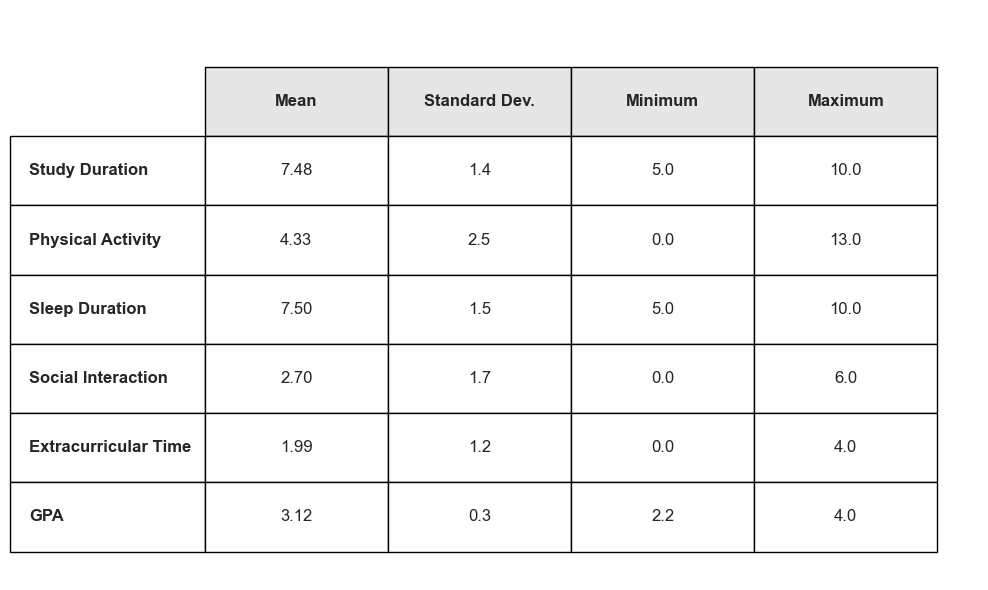

In [19]:
# Get descriptive statistics
desc_stats = df.describe().loc[['mean', 'std', 'min', 'max']]

# Select relevant columns
relevant_columns = [
    'study_hours_per_day', 'physical_activity_hours_per_day', 'sleep_hours_per_day',
    'social_hours_per_day', 'extracurricular_hours_per_day', 'gpa'
]
desc_stats = desc_stats[relevant_columns]

# Rename columns to academic language
column_mapping = {
    'study_hours_per_day': 'Study Duration',
    'physical_activity_hours_per_day': 'Physical Activity',
    'sleep_hours_per_day': 'Sleep Duration',
    'social_hours_per_day': 'Social Interaction',
    'extracurricular_hours_per_day': 'Extracurricular Time',
    'gpa': 'GPA',
}

# Rename indices for better presentation
index_mapping = {'mean': 'Mean', 'std': 'Standard Dev.', 'min': 'Minimum', 'max': 'Maximum'}
desc_stats = desc_stats.rename(index=index_mapping)

# Format the data for display
formatted_data = []
for var in relevant_columns:
    row_data = []
    for stat in desc_stats.index:
        value = desc_stats.loc[stat, var]
        if stat in ['Mean', 'SD']:
            row_data.append(f"{value:.2f}")
        else:  # Min, Max
            row_data.append(f"{value:.1f}")
    formatted_data.append(row_data)

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Create table with complete grid
table = ax.table(
    cellText=formatted_data,
    rowLabels=[column_mapping[var] for var in relevant_columns],
    colLabels=desc_stats.index,
    loc='center',
    cellLoc='center',
    bbox=[0.05, 0.05, 0.9, 0.85]  # Ensure table fits in figure
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Taller cells

# Style headers
for i in range(len(desc_stats.index)):
    table[(0, i)].set_facecolor('#E6E6E6')
    table[(0, i)].set_text_props(weight='bold')

# Style row labels
for i in range(len(relevant_columns)):
    table[(i+1, -1)].set_text_props(weight='bold')

# Ensure edges are visible
for cell in table.get_celld().values():
    cell.set_edgecolor('black')

# plt.title('Descriptive Statistics of Student Lifestyle Factors', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

### 1. Histogram of sleep hours

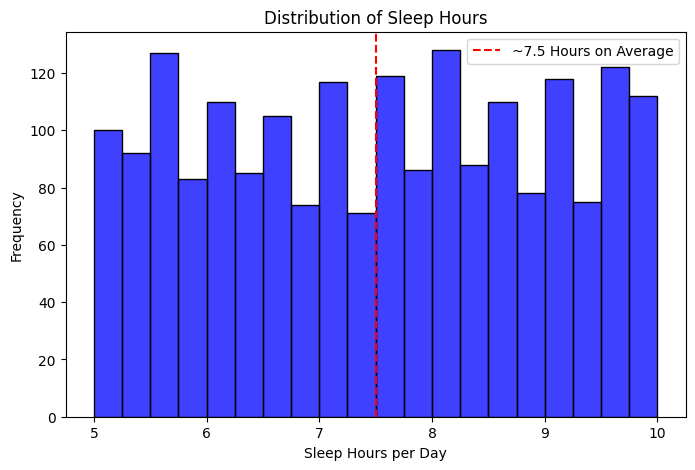

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_hours_per_day'], bins=20, color='blue')
plt.axvline(df['sleep_hours_per_day'].mean(), color='red', linestyle='--', label=f'~{df['sleep_hours_per_day'].mean():.1f} Hours on Average')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 2. Barchart with column for each stress level

Calculate counts and percentages

In [5]:
stress_counts = df['stress_level'].value_counts()
stress_percentages = (stress_counts / len(df) * 100).round(1)

Sort the data to ensure correct

In [7]:
sorted_stress = ['Low', 'Moderate', 'High']
stress_percentages = stress_percentages.reindex(sorted_stress)

In [8]:
colors = ['green', 'orange', 'red']

(0.0, 59.10999999999999)

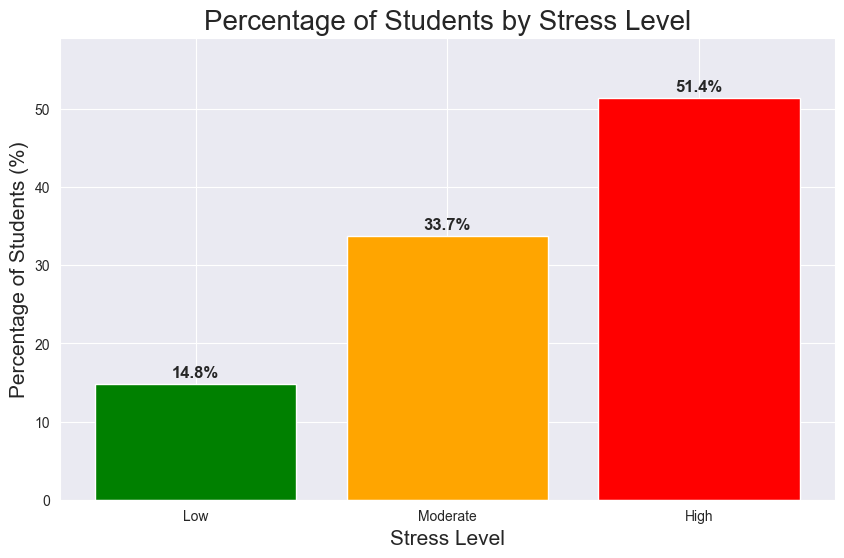

In [10]:
plt.figure(figsize=(10, 6))
bars = plt.bar(stress_percentages.index, stress_percentages.values, color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title
plt.title('Percentage of Students by Stress Level', fontsize=20)
plt.xlabel('Stress Level', fontsize=15)
plt.ylabel('Percentage of Students (%)', fontsize=15)
plt.ylim(0, max(stress_percentages.values) * 1.15)  # Add room for labels